In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np

In [4]:
# import os
# os.chdir("drive/My Drive/MLCaseStudy")

In [5]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
full_data = pd.read_csv(r"dataset.csv",sep=";",nrows=1000)

In [7]:
train_data = full_data.loc[(full_data['default'] == 0.0) | (full_data['default'] == 1.0)]
pred_data = full_data.loc[(full_data['default'] != 0.0) & (full_data['default'] != 1.0)]

In [8]:
train_data.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [9]:
train_data.shape

(1000, 43)

In [10]:
pred_data.shape

(0, 43)

In [11]:
train_data.describe()

,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
count,1000.000000,1000.000000,865.000000,865.000000,865.000000,381.000000,425.000000,425.000000,312.000000,395.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,296.000000
mean,0.014000,9898.125000,0.234682,5.387283,0.412717,0.811919,1.035294,1.145882,1.362179,1.189873,...,0.753000,0.818000,1.069000,1.22200,0.0,9167.188000,5183.776000,41341.074000,15.342219,1.138514
std,0.117549,25395.554089,4.949205,24.195272,3.494980,2.858786,0.184740,0.379160,0.605637,0.458312,...,0.595269,0.683625,0.764738,0.81816,0.0,21663.881341,14058.537222,69218.454542,5.002044,0.346023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.060000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.00000,0.0,0.000000,0.000000,3649.500000,11.712778,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.143881,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,0.0,0.000000,0.000000,16341.500000,15.698611,1.000000
75%,0.000000,2888.500000,0.000000,0.000000,0.000000,0.645204,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.00000,0.0,6785.500000,0.000000,47048.250000,19.441944,1.000000
max,1.000000,226370.000000,131.000000,365.000000,50.000000,39.507874,2.000000,3.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.00000,0.0,222749.000000,110631.000000,648207.000000,23.876667,2.000000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 1000 non-null   object 
 1   default                              1000 non-null   int64  
 2   account_amount_added_12_24m          1000 non-null   int64  
 3   account_days_in_dc_12_24m            865 non-null    float64
 4   account_days_in_rem_12_24m           865 non-null    float64
 5   account_days_in_term_12_24m          865 non-null    float64
 6   account_incoming_debt_vs_paid_0_24m  381 non-null    float64
 7   account_status                       425 non-null    float64
 8   account_worst_status_0_3m            425 non-null    float64
 9   account_worst_status_12_24m          312 non-null    float64
 10  account_worst_status_3_6m            395 non-null    float64
 11  account_worst_status_6_12m     

In [13]:
cat_columns_from_dataDict = ["default","account_status","account_worst_status_0_3m","account_worst_status_12_24m","account_worst_status_3_6m",
                       "account_worst_status_6_12m","merchant_category","merchant_group","has_paid","name_in_email","status_last_archived_0_24m",
                       "status_2nd_last_archived_0_24m","status_3rd_last_archived_0_24m","status_max_archived_0_6_months","status_max_archived_0_12_months",
                       "status_max_archived_0_24_months","worst_status_active_inv"]

In [14]:
len(set(cat_columns_from_dataDict))

17

In [15]:
train_data.isna().sum().sort_values()

uuid                                     0
num_unpaid_bills                         0
num_arch_rem_0_12m                       0
num_arch_ok_12_24m                       0
num_arch_ok_0_12m                        0
num_arch_dc_12_24m                       0
num_arch_dc_0_12m                        0
num_active_inv                           0
time_hours                               0
name_in_email                            0
max_paid_inv_0_24m                       0
max_paid_inv_0_12m                       0
has_paid                                 0
status_last_archived_0_24m               0
merchant_category                        0
merchant_group                           0
status_max_archived_0_6_months           0
default                                  0
account_amount_added_12_24m              0
status_3rd_last_archived_0_24m           0
sum_paid_inv_0_12m                       0
sum_capital_paid_account_12_24m          0
status_2nd_last_archived_0_24m           0
recovery_de

In [16]:
train_data.isnull().mean().sort_values(ascending=False)

worst_status_active_inv                0.704
account_worst_status_12_24m            0.688
account_worst_status_6_12m             0.635
account_incoming_debt_vs_paid_0_24m    0.619
account_worst_status_3_6m              0.605
account_status                         0.575
account_worst_status_0_3m              0.575
avg_payment_span_0_3m                  0.460
avg_payment_span_0_12m                 0.223
num_active_div_by_paid_inv_0_12m       0.220
num_arch_written_off_0_12m             0.179
num_arch_written_off_12_24m            0.179
account_days_in_term_12_24m            0.135
account_days_in_rem_12_24m             0.135
account_days_in_dc_12_24m              0.135
sum_paid_inv_0_12m                     0.000
sum_capital_paid_account_12_24m        0.000
sum_capital_paid_account_0_12m         0.000
recovery_debt                          0.000
status_max_archived_0_12_months        0.000
status_max_archived_0_6_months         0.000
status_3rd_last_archived_0_24m         0.000
status_2nd

In [17]:
train_data = train_data.loc[:, train_data.isnull().mean() < .49]

In [18]:
train_data.shape

(1000, 36)

In [19]:
X = train_data.drop(['uuid','default'],axis=1)
y = train_data["default"]

In [20]:
X.shape,y.shape

((1000, 34), (1000,))

In [21]:
X.isnull().mean().sort_values(ascending=False)

avg_payment_span_0_3m               0.460
avg_payment_span_0_12m              0.223
num_active_div_by_paid_inv_0_12m    0.220
num_arch_written_off_12_24m         0.179
num_arch_written_off_0_12m          0.179
account_days_in_rem_12_24m          0.135
account_days_in_term_12_24m         0.135
account_days_in_dc_12_24m           0.135
num_unpaid_bills                    0.000
status_last_archived_0_24m          0.000
status_2nd_last_archived_0_24m      0.000
status_3rd_last_archived_0_24m      0.000
account_amount_added_12_24m         0.000
status_max_archived_0_6_months      0.000
status_max_archived_0_12_months     0.000
recovery_debt                       0.000
sum_capital_paid_account_0_12m      0.000
sum_capital_paid_account_12_24m     0.000
sum_paid_inv_0_12m                  0.000
status_max_archived_0_24_months     0.000
num_arch_ok_0_12m                   0.000
num_arch_rem_0_12m                  0.000
num_arch_ok_12_24m                  0.000
num_arch_dc_12_24m                

In [22]:
#!pip install --upgrade pycaret

<AxesSubplot:xlabel='default'>

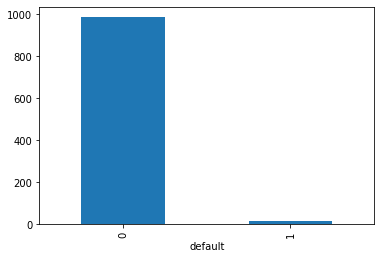

In [23]:
train_data.groupby(['default']).size().plot(kind = "bar")

In [24]:
train_data['default'].value_counts()

0    986
1     14
Name: default, dtype: int64

In [25]:
#from pycaret.classification import setup

In [26]:
categorical_features = [col for col in train_data.columns if (col in cat_columns_from_dataDict and col != "default")]
categorical_features

['merchant_category',
 'merchant_group',
 'has_paid',
 'name_in_email',
 'status_last_archived_0_24m',
 'status_2nd_last_archived_0_24m',
 'status_3rd_last_archived_0_24m',
 'status_max_archived_0_6_months',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months']

In [27]:
#experiment = setup(train_data, target='default', categorical_features=categorical_features) 

In [28]:
X.columns

Index(['account_amount_added_12_24m', 'account_days_in_dc_12_24m',
       'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#one_hot_encoders = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()
for column in categorical_features:
    print("column name : ",column)
    X[column] = le.fit_transform(X[column])

column name :  merchant_category
column name :  merchant_group
column name :  has_paid
column name :  name_in_email
column name :  status_last_archived_0_24m
column name :  status_2nd_last_archived_0_24m
column name :  status_3rd_last_archived_0_24m
column name :  status_max_archived_0_6_months
column name :  status_max_archived_0_12_months
column name :  status_max_archived_0_24_months


In [30]:
X.head(5)

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category,merchant_group,has_paid,...,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours
0,0,0.0,0.0,0.0,20,12.692308,8.333333,10,7,1,...,1,1,1,1,1,0,0,0,178839,9.653333
1,0,0.0,0.0,0.0,50,25.833333,25.000000,3,4,1,...,1,1,1,2,2,0,0,0,49014,13.181389
2,0,0.0,0.0,0.0,22,20.000000,18.000000,17,4,1,...,1,1,1,2,2,0,0,0,124839,11.561944
3,0,NaN,NaN,NaN,36,4.687500,4.888889,17,4,1,...,1,1,1,1,1,0,0,0,324676,15.751111
4,0,0.0,0.0,0.0,25,13.000000,13.000000,19,3,1,...,0,0,1,1,1,0,0,0,7100,12.698611


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((700, 34), (300, 34))

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(X_train, y_train)